# Practice Problems

Tips: 
1. Try getting rid of the code I wrote and developing everythin on your own. 
2. You can always refer to the code I provided.
3. There are better ways to do these things - Explore them, but ensure that the end results are similar.
4. Look at documentation. If you are stuck with syntax, function names, etc., you will find resources online. The idea is to develop the thought process.
5. We discuss these on Monday.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm
from scipy.stats import multivariate_normal
from scipy.stats import norm
import scipy

rng = np.random.default_rng(12345)

## Univariate Distribution

Let's look at generating samples from a Univariate Distribution. Look at template code below. Try filling in the values yourself.

1. I would like you all to refer to the documentation [(Link here)](https://numpy.org/doc/stable/reference/random/generated/numpy.random.normal.html).
2. Think about what the `loc` and `scale` inputs mean.
3. Generate Samples of a certain size. (How would you verify the shape of these? len or shape? Hint: We are working with numpy arrays) 
4. Maybe try plotting those samples? 

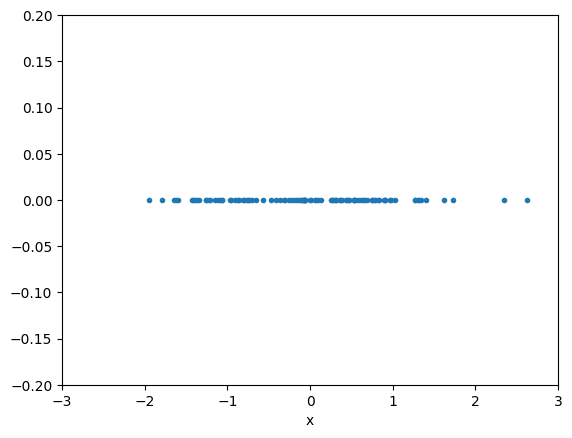

In [2]:
# Define the mean (mu)
mu = 0

# Define the standard deviation
std_dev = 1

# How many samples should we generate?
num_samples = 100

samples = rng.normal(loc=mu, scale=std_dev, size=(num_samples, 1))

# Plot them: One way would be plot the points on one of the axis. 

plt.plot(samples[:,0], [0.] * num_samples, ".")
plt.xlim(-3*std_dev, 3*std_dev) # Keeping the limits of x-axis from -3*std_dev to +3*std_dev
plt.ylim(-0.2, 0.2) # Keeping the limits of y-axis from -0.2 to 0.2. This is just a choice.
plt.xlabel("x")
plt.show()

## How do we find the PDF of this function?

Option 1. 

You can choose to implement it yourself. (It is a good exercise to do that.)
Remember: 
A random variable X is normally distributed with mean $\mu$ and variance $\sigma^2$ if it has the probability density function of X as:
$$ f(x) = \frac{1}{\sqrt{2 \pi} \sigma} exp{\left(-\frac{{\left(x - \mu \right)}^{2}}{2 \sigma^{2}}\right)}$$

Think about how you would implement this function?
1. What inputs should the function take? 
    1. Which of the inputs are vectors and which would be scalars? 
    2. Do the vectors go in as list? or as numpy arrays?
2. What should be the outputs of the function?
3. In the function, should I use a `for` loop or can I avoid it? 

Option 2.

You can choose to use function from `scipy`? Look at the documentation here ([Link here](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.norm.html)):

1. Think about what the `loc` and `scale` inputs mean.
2. Generate Samples of a certain size. (How would you verify the shape of these? len or shape? Hint: We are working with numpy arrays) 
3. Maybe try plotting those samples? 
4. Compare the output to what you implemented? Good plotting Exercise: How to plot two subfigures in the same plot?


Samples shape: (1000, 1)
Shape of PDF of samples using scipy: (1000, 1)
Shape of PDF of samples using our implementation: (1000, 1)


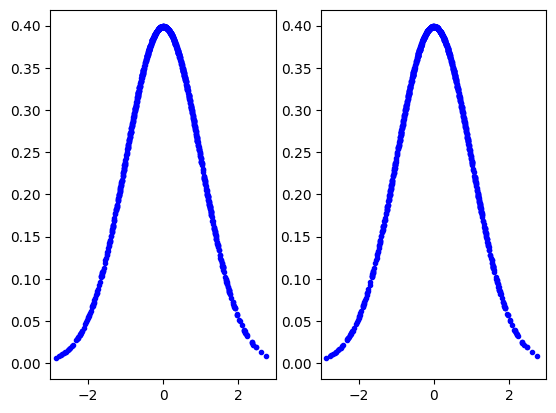

In [3]:
# Define the mean, and sigma and num_samples again to keep everything clean:

mu = 0 # Define the mean (mu)
std_dev = 1 # Define the standard deviation
num_samples = 1000 # How many samples should we generate?

samples = rng.normal(loc=mu, scale=std_dev, size=(num_samples, 1)) # Generate the samples


####################################################################################
####################################################################################

# Option 1:

def univariate_density(x, mu, sigma):
    # The function takes in 3 inputs: The samples, mean, std_dev
    return (2*np.pi*sigma**2)**(-.5) * np.exp(-.5* ((x - mu)/sigma)**2)

pdf_values_implementation = univariate_density(samples, mu = mu, sigma=std_dev)

# Code for option 1 ends here
####################################################################################
####################################################################################

# Option 2:

pdf_values_scipy = norm.pdf(samples, loc = mu, scale=std_dev)


# Code for option 2 ends here
####################################################################################
####################################################################################


# Verifying Shapes
print(f"Samples shape: {samples.shape}")
print(f"Shape of PDF of samples using scipy: {pdf_values_scipy.shape}")
print(f"Shape of PDF of samples using our implementation: {pdf_values_implementation.shape}")

# Plot them

fig, ax = plt.subplots(1,2)

ax[0].plot(samples[:,0], pdf_values_implementation[:,0], "b.", label = "Function Implementation")
ax[0].set_xlim(-3*std_dev, 3*std_dev)

ax[1].plot(samples[:,0], pdf_values_scipy[:,0], "b.", label = "Scipy norm.pdf Function")
ax[1].set_xlim(-3*std_dev, 3*std_dev)

plt.show()

Samples shape: (1000,)
Samples shape after reshaping it: (1000, 1)
Shape of PDF of samples using scipy: (1000, 1)
Shape of PDF of samples using our implementation: (1000, 1)


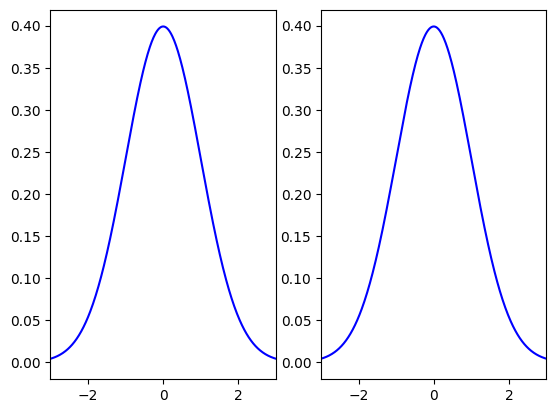

In [4]:
# To get cleaner plots, you can use linealy spaced points.
# If you use this, take care of shapes. You will have to reshape it.

# Define the mean, and sigma and num_samples again to keep everything clean:

mu = 0 # Define the mean (mu)
std_dev = 1 # Define the standard deviation
num_samples = 1000 # How many samples should we generate?

#########################################################################
# The big difference is here:
samples = np.linspace(mu - 6*std_dev, mu + 6*std_dev, num_samples)
samples_reshaped = samples.reshape(-1,1)
# Verifying Shapes
print(f"Samples shape: {samples.shape}")
print(f"Samples shape after reshaping it: {samples_reshaped.shape}")
#########################################################################

pdf_values_implementation = univariate_density(samples_reshaped, mu = mu, sigma=std_dev)
pdf_values_scipy = norm.pdf(samples_reshaped, loc = mu, scale=std_dev)

# Verifying Shapes
print(f"Shape of PDF of samples using scipy: {pdf_values_scipy.shape}")
print(f"Shape of PDF of samples using our implementation: {pdf_values_implementation.shape}")

fig, ax = plt.subplots(1,2)

ax[0].plot(samples_reshaped[:,0], pdf_values_implementation[:,0], "b-", label = "Function Implementation")
ax[0].set_xlim(-3*std_dev, 3*std_dev)

ax[1].plot(samples_reshaped[:,0], pdf_values_scipy[:,0], "b-", label = "Scipy norm.pdf Function")
ax[1].set_xlim(-3*std_dev, 3*std_dev)

plt.show()

## Bivariate Distributions


Let's look at generating samples from a Bivariate Normal Distribution. Look at template code below. Try filling in the values yourself.

Option 1: Do it Yourself

Think about how you would approach this problem. Create a plan:

Here is what I would think:

1. Generate samples:
2. Find the value of PDF for the joint distribution : 
    1. Refer to this link :[https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.multivariate_normal.html](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.multivariate_normal.html)
3. How do I plot it?

Minor Side Thoughts:
1. Should I generate random samples? Should I generate Linearly spaced samples? 
2. What kind of plot would look prettier and easier to implement?

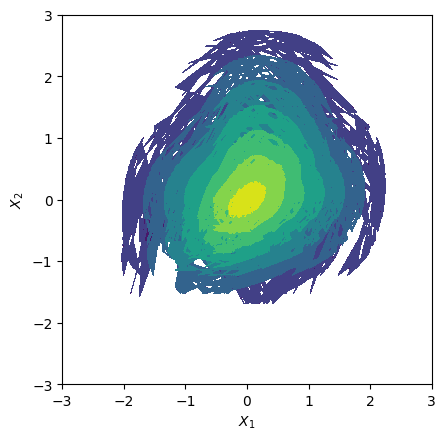

In [5]:
# Define the mean, and sigma and num_samples again to keep everything clean:

mu = np.array([0,0]) # Define the mean (mu)
sigma = np.array([[1,0.5],[0.5,1]]) # Define the covariance matrix
num_samples = 50 # How many samples should we generate?

# Draw samples from the two components indpendently. 

samples_component_1 = rng.normal(loc=mu[0], scale=sigma[0,0], size=(num_samples, 1)) # Generate the samples for component 1
samples_component_2 = rng.normal(loc=mu[1], scale=sigma[1,1], size=(num_samples, 1)) # Generate the samples for component 2

# Plotting Function requires to create a meshgrid. Look at the documentation of contourf
M1, M2 = np.meshgrid(samples_component_1, samples_component_2)

# Now M1 and M2 are 2d matrices. But multivariate_normal pdf can only take 
# inputs where different columns denote different components :(

# Flatten M1 and M2 First and then put them in a single stack
M1_flat = M1.flatten()
M2_flat = M2.flatten()
flattened_samples = np.vstack((M1_flat, M2_flat)).T

# Compute the PDF. It would be a good exercise to implement it.
pdf_joint_distribution = []
for x in flattened_samples:
    pdf_joint_distribution.append(multivariate_normal.pdf(x, mean = mu, cov=sigma))

pdf_joint_distribution = np.array(pdf_joint_distribution) # COnverting list to numpy array


# I even need to reshape my output (pdf_joint_distribution) to match the M1 and M2: 
pdf_joint_distribution_plot = pdf_joint_distribution.reshape(M1.shape)

# Plot it
fig = plt.figure()
ax = fig.add_subplot()
ax.contourf(M1, M2, pdf_joint_distribution_plot, cmap='viridis')
ax.set_aspect("equal")
ax.set_xlim(mu[0] - 3*sigma[0,0], mu[0] + 3*sigma[0,0])
ax.set_ylim(mu[1] - 3*sigma[1,1], mu[1] + 3*sigma[1,1])
ax.set_xlabel(r"$X_1$")
ax.set_ylabel(r"$X_2$")
plt.show()

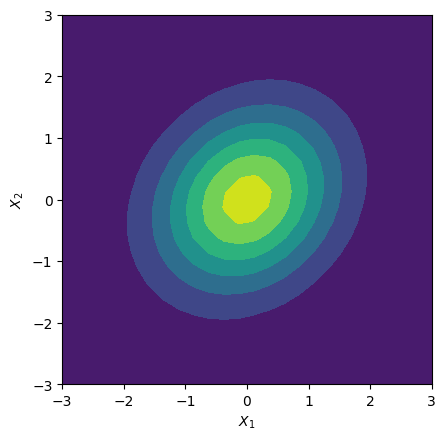

In [6]:
# Using Linspace for sample generation

# Define the mean, and sigma and num_samples again to keep everything clean:

mu = np.array([0,0]) # Define the mean (mu)
sigma = np.array([[1,0.2],[0.2,1]]) # Define the covariance matrix
num_samples = 50 # How many samples should we generate?

# Draw samples from the two components indpendently. 

samples_component_1 = np.linspace(mu[0] - 6*sigma[0,0], mu[0] + 6*sigma[0,0], num_samples) # Generate the samples for component 1
samples_component_2 = np.linspace(mu[1] - 6*sigma[1,1], mu[1] + 6*sigma[1,1], num_samples) # Generate the samples for component 2

# Plotting Function requires to create a meshgrid. Look at the documentation of contourf
M1, M2 = np.meshgrid(samples_component_1, samples_component_2)

# Now M1 and M2 are 2d matrices. But multivariate_normal pdf can only take 
# inputs where different columns denote different components :(

# Flatten M1 and M2 First and then put them in a single stack
M1_flat = M1.flatten()
M2_flat = M2.flatten()
flattened_samples = np.vstack((M1_flat, M2_flat)).T

# Compute the PDF. It would be a good exercise to implement it.
pdf_joint_distribution = []
for x in flattened_samples:
    pdf_joint_distribution.append(multivariate_normal.pdf(x, mean = mu, cov=sigma))

pdf_joint_distribution = np.array(pdf_joint_distribution) # COnverting list to numpy array


# I even need to reshape my output (pdf_joint_distribution) to match the M1 and M2: 
pdf_joint_distribution_plot = pdf_joint_distribution.reshape(M1.shape)

# Plot it
fig = plt.figure()
ax = fig.add_subplot()
ax.contourf(M1, M2, pdf_joint_distribution_plot, cmap='viridis')
ax.set_aspect("equal")
ax.set_xlim(mu[0] - 3*sigma[0,0], mu[0] + 3*sigma[0,0])
ax.set_ylim(mu[1] - 3*sigma[1,1], mu[1] + 3*sigma[1,1])
ax.set_xlabel(r"$X_1$")
ax.set_ylabel(r"$X_2$")
plt.show()

## Marginalization

Given a multivariate distribution, can we compute the pdf of a single variable? - Yes

$f(X_1) = \int{f(X_1, X_2) dX_2}$


Every random variables $X_i \in \mathbf{X}$ has the following distribution: $X_i \sim \mathcal{N}(\mu_i, \Sigma_{i,i})$

Feel free to play around with mean and covariance.

How would you plot these?


# Gaussian Process regression 1-D

We will start by generating a synthetic dataset. The true generative process
is defined as $f(x) = x \sin(x)$ where $x\in [0,10]$


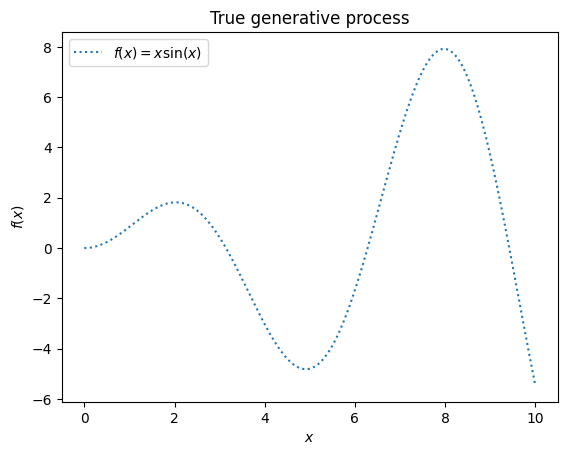

In [7]:
# Generate linearly spaced points
X = np.linspace(start=0, stop=10, num=1000).reshape(-1, 1)

# Compute the values of the output based on the function defined above.
y = np.squeeze(X * np.sin(X))

# Plot it


plt.plot(X, y, label=r"$f(x) = x \sin(x)$", linestyle="dotted")
plt.legend()
plt.xlabel("$x$")
plt.ylabel("$f(x)$")
_ = plt.title("True generative process")

## Performing Regression with different priors:

Here are the following cases:

* Case 1: 10 points from X that are equally spaced 
* Case 2: 10 points from X that are random chosen
* Case 3: 20 points from X that are equally spaced
* Case 4: 20 points from X that are randomly chosen

I will write the code here for case 1. I would like you all to do try Case 2,3, and 4.

`Food for thought`:

What happens if you decrese the number of prior points to less than 10. (Lets say 5, or 3). 

1. Check the error. Think about what's happening. 

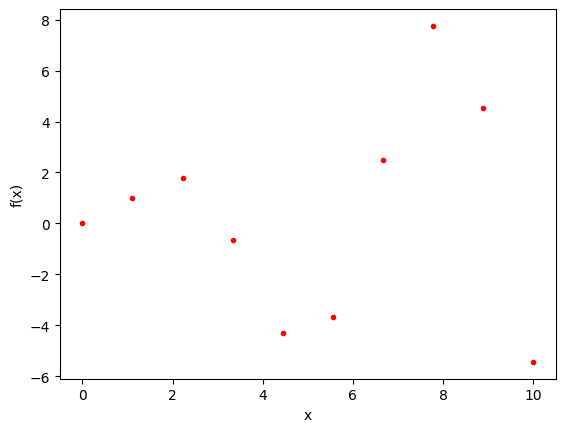

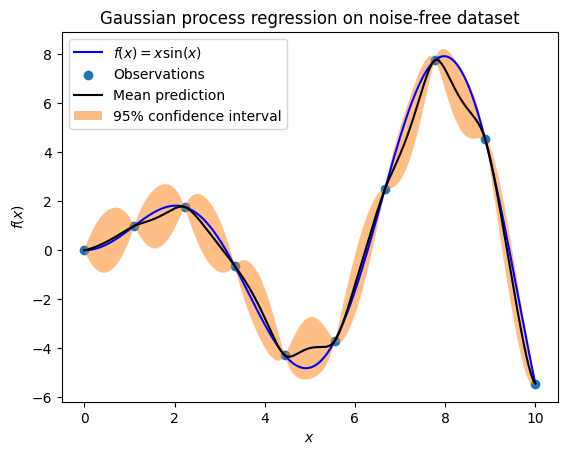

In [8]:
# Lets address Case 1
# Here is an approach:
# I generate 10 points directly that are equispaced between [0,10]

# We will fit the GP on these points
num_points = 10
prior_samples = np.linspace(0,10,num_points).reshape(-1,1) # Check what happens when you do not reshape. Something to do with sizes of the numpy arrays.
prior_function_values = np.squeeze(prior_samples * np.sin(prior_samples))

# For prediction, I will use these 1000 points
test_set_samples = np.linspace(0,10,1000).reshape(-1,1)


# Lets try plotting the prior points in red:
plt.plot(prior_samples, prior_function_values, "r.")
plt.xlabel("x")
plt.ylabel("f(x)")
plt.show()


# Now that we have the prior/training points. Lets do the GPR

# Define kernel first:
# In class we saw an example of RBF kernel. 
# I will use Matern Kernel here
# Since I haven't imported the Matern kernel, let me import it.
from sklearn.gaussian_process.kernels import Matern
from sklearn.gaussian_process import GaussianProcessRegressor

kernel = Matern(length_scale_bounds=(1e-2,1e2)) # try looking at the documentation if you are curious

# Next, lets us define the Gaussian Process Regressor.
gaussian_process = GaussianProcessRegressor(kernel=kernel, n_restarts_optimizer=9)

# Fit the model:
gaussian_process.fit(prior_samples, prior_function_values)

# Predict on the points we defined:

mean_prediction, std_prediction = gaussian_process.predict(test_set_samples, return_std=True)

# First, I will plot the true function values we defined in the block before this
# This is just compare how the mean of the prediction compares against the true one
plt.plot(X, y, "b-", label=r"$f(x) = x \sin(x)$")

# Plot the prior points
plt.scatter(prior_samples, prior_function_values, label="Observations")

# Plot the test set samples and mean_prediction
plt.plot(test_set_samples, mean_prediction, "k-", label="Mean prediction")

# Use this to plot the area between mean +- 1.96*std_dev
# You can just plot two lines above and below like you did for mean function.
# Think about how you could do that.
plt.fill_between(
    X.ravel(),
    mean_prediction - 1.96 * std_prediction,
    mean_prediction + 1.96 * std_prediction,
    alpha=0.5,
    label=r"95% confidence interval",
)
plt.legend()
plt.xlabel("$x$")
plt.ylabel("$f(x)$")
_ = plt.title("Gaussian process regression on noise-free dataset")

# Gaussian Process regression 2-D

We will start by generating a synthetic dataset. The true generative process
is defined as $$f(x_1,x_2) = (x_1-3)^2 + 2x_1x_2 + (2x_2+3)^2 - 3$$ where $x_1, x_2 \in [-5,5]^2$


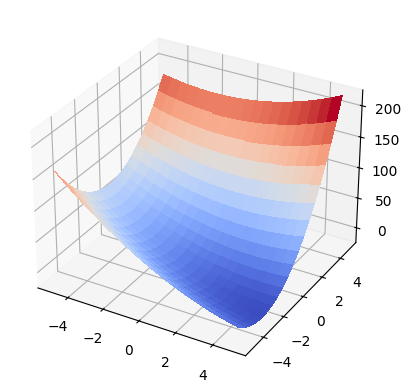

Samples have shape: (400, 2)
Corresponding function values have shape: (400, 1)


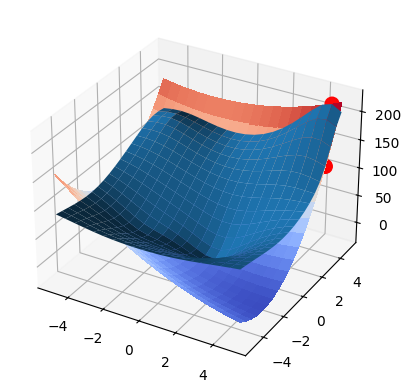

In [9]:
## Creating the Dataset

num_samples = 20  # Number of points in each direction
x1= np.linspace(-5.,5.,num_samples)  # x-vector
x2 = np.linspace(-5.,5.,num_samples)  # y-vector
X1, X2 = np.meshgrid(x1, x2)  # x and y are (num_samples, num_samples) matrices
Y = (X1-3.)**2. + 2.*X1*X2 + (2.*X2+3.)**2. - 3.

fig, ax = plt.subplots(subplot_kw={"projection": "3d"})

# Lets try plotting them?
surf = ax.plot_surface(X1, X2, Y, cmap=cm.coolwarm,
                       linewidth=0, antialiased=False)

plt.show()
#################################################################

# For the GPR, I need my dataset to be of shape (num_sample, dimensionality).
# In this case, num_samples would be 400. Why?
# In this case, dimensionality = 2. Why?

X_dataset = np.column_stack((X1.reshape(-1), X2.reshape(-1))) # Think about why we do this?
Y_dataset = Y.reshape(-1,1) # Think about why we do this?

# Check the shapes of dataset_X and dataset_Y
print(f"Samples have shape: {X_dataset.shape}")
print(f"Corresponding function values have shape: {Y_dataset.shape}")

##################################################################


# Choose 50 random point as priors
# I can generate 50 random integers between 1 and 400 and use the indices to get the prior points

rng = np.random.RandomState(1)
training_indices = rng.choice(np.arange(Y_dataset.size), size=6, replace=False) # Take a look at what np.arange() does?
X_prior, Y_prior = X_dataset[training_indices, :], Y_dataset[training_indices] # Think about how I am slicing/indexing

##############################################################################

# Do the usual stuff for gaussian process regression

kernel = Matern() # try looking at the documentation if you are curious
gaussian_process_2d = GaussianProcessRegressor(kernel, normalize_y=True )
gaussian_process_2d.fit(X_prior, Y_prior)

mean_prediction, std_prediction = gaussian_process_2d.predict(X_dataset, return_std=True)

# Plotting below

fig, ax = plt.subplots(subplot_kw={"projection": "3d"})

# Lets try plotting them?

# Plotting the true Surface
surf = ax.plot_surface(X1, X2, Y, cmap=cm.coolwarm,
                       linewidth=0, antialiased=False)


# Plotting the points
ax.scatter(X_prior[:,0], X_prior[:,1], Y_prior, s=100, c="r")

# Plotting the prediction mean. But we will have to reshape first
mean_prediction_reshaped = mean_prediction.reshape(X1.shape)
std_prediction_reshaped = std_prediction.reshape(X1.shape)
surf = ax.plot_surface(X1,X2, mean_prediction_reshaped)

plt.show()
#################################################################

